---

## K-Nearest Neighbors (KNN) Algorithm and Applications
#### Author: Tianyi Mao

---


# Student Depression Prediction with K-Nearest Neighbors (KNN)

This project focuses on predicting the likelihood of depression among students using a dataset of mental health and lifestyle factors. Depression is a critical issue in student populations, and machine learning models can help identify at-risk individuals by analyzing patterns in their data.

This project will follow a 4-step process typical of a machine learning workflow:

**Step 1**: Data Cleaning and Analysis  
**Step 2**: Train the Model  
**Step 3**: Evaluate the Model  
**Step 4**: Choose Optimal K

## **Step 1: Data Cleaning and Analysis**

In this step, we prepare the dataset for modeling by:
- Removing irrelevant columns.
- Encoding categorical variables into numerical values.
- Handling missing data by filling in median values for each feature.
- Scaling the features to ensure uniformity, which is critical for KNN models.
- Splitting the data into training and testing sets (60/40 split).

---

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64
   Gender   Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
0       1  33.0                5.0            0.0  8.97                 2.0   
1       0  24.0                2.0            0.0  5.90

/var/folders/1h/pt2dqtvd0_733mkpkbgbr4tr0000gn/T/ipykernel_63889/3376086611.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Financial Stress'].fillna(data['Financial Stress'].median(), inplace=True)


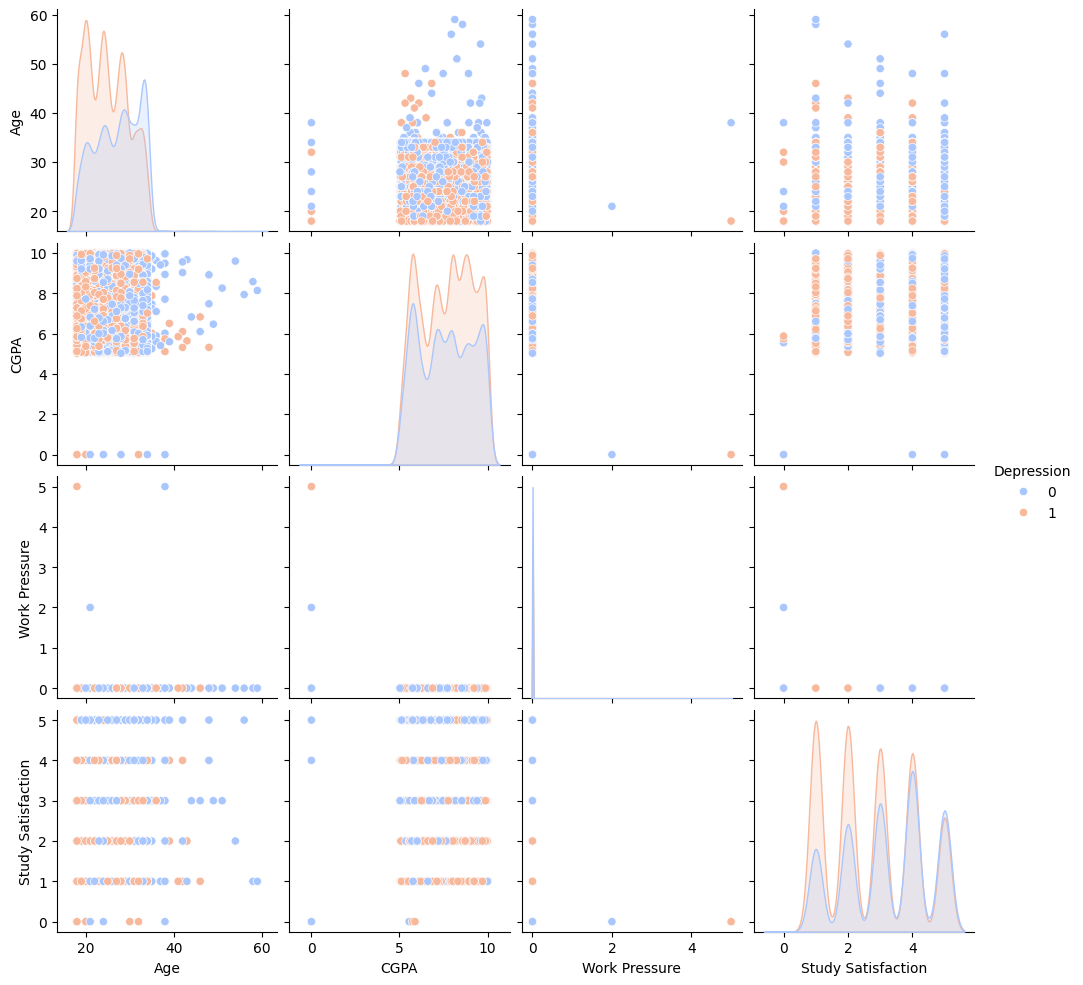

In [25]:
#Load data
file_path = "/Users/sherrymao/Documents/Git/INDE577-TianyiMao/Data/Depression_data/Student Depression Dataset.csv"  # Update the path if needed
data = pd.read_csv(file_path)

#print(data.head())

missing_values = data.isnull().sum()
print(missing_values)

# Drop irrelevant columns like 'id'
data = data.drop(columns=['id', 'City', 'Profession'])  # 'City' and 'Profession' might have too many unique values

# Encode categorical variables using LabelEncoder
label_enc_cols = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Degree',
                  'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

le = LabelEncoder()
for col in label_enc_cols:
    data[col] = le.fit_transform(data[col])

# Check for missing values and handle them
data['Financial Stress'].fillna(data['Financial Stress'].median(), inplace=True)

# Features (X) and target (y)
X = data.drop(columns=['Depression'])
y = data['Depression']

# Display processed data
print(data.head())

# Select only numeric columns for pairplot
selected_features = ['Age', 'CGPA', 'Work Pressure', 'Study Satisfaction', 'Depression']
numeric_features = data[selected_features].select_dtypes(include=['float64', 'int64']).columns

# Pairplot for numeric features
sns.pairplot(data[numeric_features], hue='Depression', palette='coolwarm', diag_kind='kde')
plt.show()

## **Step 2: Train the Model**

We initialize and train a **K-Nearest Neighbors (KNN)** model. KNN is a simple yet powerful algorithm that classifies a sample based on the majority label among its k-nearest neighbors in the feature space. For this implementation:
- We set `k=5` (default value).
- Train the model using the preprocessed training set.

---

In [26]:
# Train the KNN model
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Default k value
knn_clf.fit(X_train, y_train)


KNeighborsClassifier()

## **Step 3: Evaluate the Model**

The trained KNN model is evaluated on the test set using:
- **Accuracy Score**: Measures the proportion of correct predictions.
- **Confusion Matrix**: Provides a detailed view of true positives, true negatives, false positives, and false negatives.
- **Classification Report**: Offers precision, recall, F1-score, and support for both classes (depressed and not depressed).

---


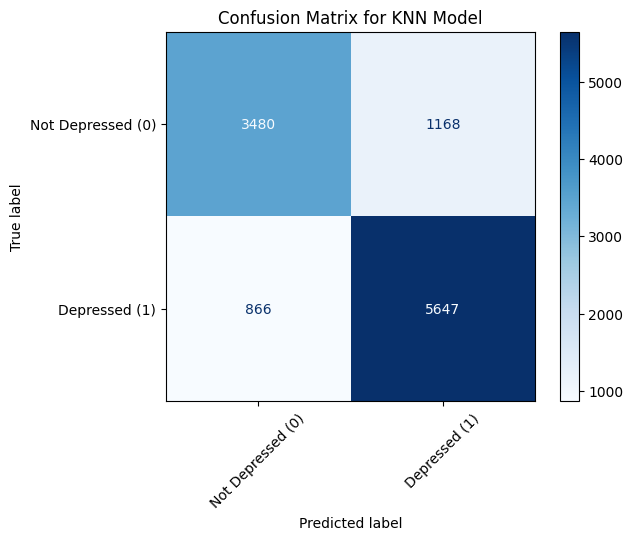

KNN Accuracy: 0.82

Confusion Matrix:
[[3480 1168]
 [ 866 5647]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      4648
           1       0.83      0.87      0.85      6513

    accuracy                           0.82     11161
   macro avg       0.81      0.81      0.81     11161
weighted avg       0.82      0.82      0.82     11161



In [27]:
# Make predictions
y_pred = knn_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plot the confusion matrix
class_labels = ["Not Depressed (0)", "Depressed (1)"]
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_labels, cmap='Blues', xticks_rotation=45
)

# Add title and display the plot
plt.title("Confusion Matrix for KNN Model")
plt.show()

print(f"KNN Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

KNN model had a strong performance in predicting depression status among students. It achieved an overall accuracy of 82%, which is pretty solid. 

By looking at the conflusion matrix, it looks like the model performs slightly better in identifying depressed students, as evidenced by a lower number of false negatives compared to false positives. This suggests that the model minimizes the risk of underdiagnosing depression, although it tends to overdiagnose depression in students who are not at risk.

For students who were not depressed, the precision was 80%. The recall for this class was 75%. The F1-score was 77% for this class. For students who were depressed, the model had a precision of 83%, recall of 87%, and an F1-score of 85%. The model did a fair job in identifying students with depression, as it performed particularly well in terms of recall for both depressed and non-depressed students. 

However, the model’s tendency to produce false positives for non-depressed students indicates potential model's inadequancies, as some students may be incorrectly flagged as depressed.

In summary, the KNN model showed reliable performance in predicting depression status. Future refinements could focus on addressing the false positive rate to improve precision for non-depressed students. 

Next, we will optimize k to see if the performance beceomes better. 

## **Step 4: Choose Optimal k**

The value of `k` can significantly influence the model's performance. In this step, we tune the `k` parameter by:
- Testing a range of `k` values (e.g., 1 to 20).
- Calculating the error rate for each value of `k`.
- Visualizing the relationship between the error rate and `k` to select the optimal value for the model.

---

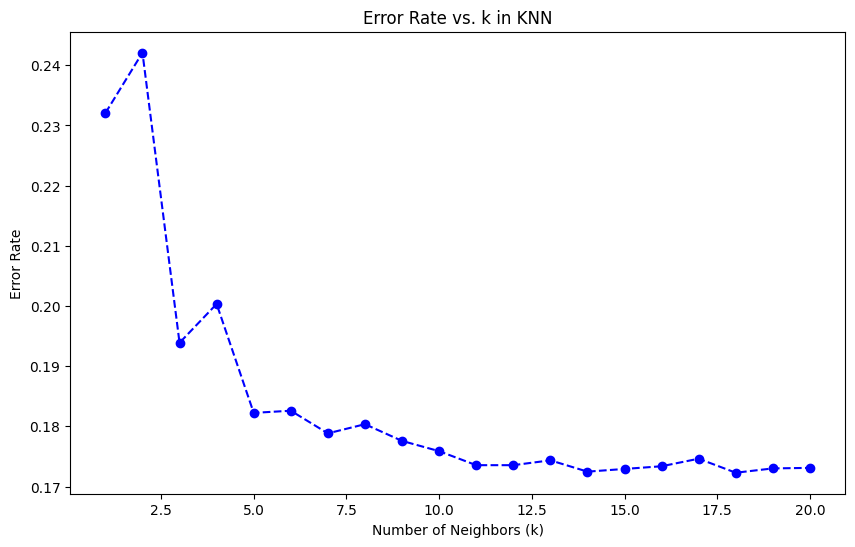

In [28]:
# Tune k by testing multiple values
errors = []
k_range = range(1, 21)
for k in k_range:  # Test k values from 1 to 20
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    errors.append(1 - accuracy_score(y_test, y_pred))

# Plot errors vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_range, errors, marker='o', linestyle='--', color='blue')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("Error Rate vs. k in KNN")
plt.show()


Based on the graph of Number of Neighbors (k) versus Error Rate, we see error rate decreases as number of k increases.Initially, there is a sharly decrease, and then the error rate stabilizes. This trend provides insights regarding optimal k to balance model performance. From k = 5 onward, the error rate stabilizes around 18%. At larger values of k, such as k = 10 to 20, the model reaches a plateau. This stabilization suggests that the model has found an optimal trade-off between bias and variance, where the predictions are neither overfitting nor underfitting the data.

In this case, values of k between 10 and 20 appear to minimize the error rate, which are optimal for this KNN model.